In [1]:
from ipywidgets import IntProgress
IntProgress(10,max=100)

IntProgress(value=10)

In [2]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
import sys
print(sys.executable)

#sys.path.append('./anaconda3/lib/python3.7/site-packages')

/Library/Frameworks/Python.framework/Versions/3.6/bin/python3


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# From Gaia Clusters Notebook

from astroquery.gaia import Gaia

import astropy.units as u
import gzip
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity

from astroquery.simbad import Simbad
from scipy.stats import kde
import matplotlib as mpl
import os
import time
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statistics import median
from math import *
%matplotlib inline

import scipy as sp

from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde

import ipywidgets as widgets
from IPython.display import display, clear_output


import starcolorindexSpT
import GaiaFunctionstDictArc as tb
     
print("\nInitialize!")
    

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443

Initialize!


In [6]:
# Save default background color display

Ipython_default = plt.rcParams.copy()

# reset rcParams
#plt.rcParams.update(Ipython_default)

In [7]:
plt.style.use('dark_background')

In [8]:

# Add timing functions to measure how long database queries take.

from datetime import datetime

def timer_start():
  global start_time
  start_time = datetime.now()

def timer_stop():
  time_elapsed = datetime.now() - start_time

  da, remainder  = divmod(time_elapsed.total_seconds(), 24*3600)
  hrs, remainder = divmod(remainder, 3600)
  mins, secs = divmod(remainder, 60)

  if da:
      print(f'{int(da)} days {int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
  elif hrs:
      print(f'{int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
  elif mins:
      print(f'{int(mins)} minutes {int(secs)} seconds elapsed')
  elif secs >= 1.0:
      print(f'{int(secs)} seconds elapsed')
  else:
      print(f'{secs:.2} seconds elapsed')
        
print('timer functions loaded')

timer functions loaded


In [9]:
def dms_to_dd(sign, d, m, s):
    dd = abs(d) + float(abs(m))/60 + float(abs(s))/3600
    if sign=='-':
        dd *= -1
    elif sign!='+':
        assert False, "Don't forget to include a sign. For example, dms_to_dd('-', 5, 23, 28)"
    return dd

def hms_to_dd(h, m, s):
    dd = h*15 + float(m)/4 + float(s)/240
    return dd


In [86]:
import imp
imp.reload(tb)

import ipywidgets as widgets
from IPython.display import display, clear_output

r1_select_variable = widgets.Dropdown(
     options=[
     'm2', 'm3', 'm4', 'm5', 'm6',  'm7', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'm16','m17', 'm18','m19', 
     'm21', 'm22', 'm23', 'm24', 'm25', 'm26', 'm28', 'm29', 'm30', 'm34', 'm35', 'm36', 'm37', 'm38', 'm39',
     'm41', 'm42', 'm44', 'm45', 'm46', 'm47', 'm48', 'm50', 'm52', 'm53',  'm54', 'm55', 'm56', 'm67', 'm68', 'm69', 
     'm70', 'm71', 'm72', 'm75', 'm79', 'm80', 'm92', 'm93', 'm103', 'm107',
         
     'ngc104', 'ngc188', 'ngc288', 'ngc362',  'ngc752', 'ngc869', 'ngc884', 'ngc1039', 'ngc1261', 'ngc1851', 
         
     'ngc2158', 'ngc2232', 'ngc2298', 'ngc2323', 'ngc2360', 'ngc2362', 'ngc2419', 'ngc2422', 'ngc2447', 'ngc2477', 
     'ngc2516', 'ngc2547', 'ngc2548', 'ngc2632', 'ngc2682', 'ngc2808', 'ngc3201', 'ngc3532',  
     'ngc4147', 'ngc4372', 'ngc4833', 'ngc5053', 'ngc5139', 'ngc5272', 'ngc5286', 'ngc5316', 'ngc5466', 
     'ngc5634', 'ngc5694', 'ngc5824', 'ngc5897', 'ngc5904', 'ngc5927', 'ngc5946', 'ngc5986',
     'ngc6025', 'ngc6101', 'ngc6139', 'ngc6144', 'ngc6205', 'ngc6218', 'ngc6229', 'ngc6235', 'ngc6256',
     'ngc6281', 'ngc6284', 'ngc6287', 'ngc6293', 'ngc6304', 'ngc6316', 'ngc6325', 'ngc6333',
     'ngc6341', 'ngc6342', 'ngc6352', 'ngc6355', 'ngc6356', 'NGC6362', 'ngc6366', 'ngc6380', 'ngc6388',
     'ngc6397', 'ngc6401', 'ngc6405', 'ngc6426', 'ngc6440', 'ngc6441', 'ngc6453', 'ngc6475', 'ngc6496', 
     'ngc6517', 'ngc6522', 'ngc6528', 'ngc6535', 'ngc6539', 'ngc6540', 'ngc6541', 'ngc6544', 'ngc6553',
     'ngc6558', 'ngc6569', 'ngc6584', 'ngc6624', 'ngc6626', 'ngc6638', 'ngc6642', 'ngc6652', 'ngc6656',
     'ngc6705', 'ngc6712', 'ngc6717', 'ngc6723', 'ngc6749', 'ngc6752', 'ngc6760', 'ngc6774', 'ngc6793', 
     'ngc6809', 'ngc6819',  'ngc6934','ngc7006', 'ngc7092', 'ngc7099', 'ngc7492', 'ngc7789',
         
     'IC2391', 'IC2602', 'IC4651', 'IC4756',
         
     'Hyades', 'Praesepe', '47Tucanae', 

    'Choose a target'],
    value='Choose a target',
    description='Target:',
    disabled=False,
)
def get_variable(b):
    clear_output
    print(r1_select_variable.value)
    
display(r1_select_variable)

Dropdown(description='Target:', index=180, options=('m2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm9', 'm10', 'm11', 'm…

In [97]:
target1 = r1_select_variable.value

if target1[0:3] == 'ngc':
    target1 = 'NGC' + str(target1[3:])

print("Target: " + str(target1))

Target: NGC3201


In [99]:
import GaiaFunctionstDictArc as arc

sArc = float(arc.getStarArc(target1))
print("Angular diamenter: " + str(sArc))


Angular diamenter: 18.2


In [100]:
cRADIUS = round((dms_to_dd('+', 0, sArc, 0)/2),4)
print("RADIUS: " + str(cRADIUS))

RADIUS: 0.1517


In [101]:
target = str(target1)
print(str(target) + "\n")

object = Simbad.query_object(target)
ra = object["RA"]

ra = object["RA"]
RA = ra.data[0]
print("RA: " + str(RA))

dec = object["DEC"]
DEC = dec.data[0]
print("DEC: " + str(DEC))

string = str(RA+ ' '+DEC)
c = SkyCoord(string, unit=(u.hourangle, u.deg))

Ra = str(round(c.ra.degree,4))
print("\nRa: " + str(Ra))

Dec = str(round(c.dec.degree,4))
print("Dec: " + str(Dec))

sRaDec = str(Ra+","+Dec)
print("\nRADIUS: " + str(cRADIUS))

NGC3201

RA: 10 17 36.82
DEC: -46 24 44.9

Ra: 154.4034
Dec: -46.4125

RADIUS: 0.1517


In [102]:
################################################## Medium ########################################################

In [103]:
timer_start()

bigstring = str("""SELECT all 
                    gaia_source.source_id,
                    gaia_source.ra,
                    gaia_source.ra_error,
                    gaia_source.dec,
                    gaia_source.dec_error,
                    gaia_source.parallax,
                    gaia_source.parallax_error,
                    gaia_source.pmra,
                    gaia_source.pmra_error,
                    gaia_source.pmdec,
                    gaia_source.pmdec_error,
                    gaia_source.phot_g_mean_mag,
                    gaia_source.phot_bp_mean_mag,
                    gaia_source.phot_rp_mean_mag,
                    gaia_source.bp_rp,
                    gaia_source.bp_g,
                    gaia_source.g_rp,
                    gaia_source.dr2_radial_velocity,
                    gaia_source.dr2_radial_velocity_error  
                    FROM gaiaedr3.gaia_source  
    WHERE CONTAINS(POINT('ICRS',gaiaedr3.gaia_source.ra,gaiaedr3.gaia_source.dec),
    CIRCLE('ICRS',""" + 
    sRaDec + "," + str(cRADIUS) + 
    "))=1 " + """
   AND gaia_source.parallax IS NOT NULL 
   AND phot_g_mean_flux_over_error>50 
   AND phot_rp_mean_flux_over_error>20 
   AND phot_bp_mean_flux_over_error>20 
   AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2) 
   AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2) 
   AND visibility_periods_used>8 
   AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5))) 
   AND gaia_source.bp_rp IS NOT NULL""")
                
job = Gaia.launch_job_async(bigstring, dump_to_file=False)
    
timer_stop()

INFO: Query finished. [astroquery.utils.tap.core]
4 seconds elapsed


In [104]:
print( "\n" + str(target) + "\n")

print(job)


NGC3201

<Table length=8727>
           name            dtype    unit                              description                             n_bad
------------------------- ------- -------- ------------------------------------------------------------------ -----
                source_id   int64          Unique source identifier (unique within a particular Data Release)     0
                       ra float64      deg                                                    Right ascension     0
                 ra_error float32      mas                                  Standard error of right ascension     0
                      dec float64      deg                                                        Declination     0
                dec_error float32      mas                                      Standard error of declination     0
                 parallax float64      mas                                                           Parallax     0
           parallax_error float32      mas

In [105]:
# load results into a pandas dataframe

r1 = (job.get_results()).to_pandas()

In [106]:
###

t = target1

sf = str(sArc).replace('.', '_')

r1.to_csv("./Documents/Gaia DR9/" + str(t) + "_EDR3_OC_Arc_"  + str(sf) + '_M' + str(r1.shape[0]) +  ".csv")

print("\nTarget medium size: " + str(t) + " Done!")

###


Target medium size: NGC3201 Done!


In [107]:
#######################################################################################################################

In [108]:
timer_start()

r1['SpT2'] = r1.apply(lambda row: starcolorindexSpT.subclass[round(row.bp_rp, 2)], axis=1)

r1['M'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10
r1['AbsoluteMagnitude'] = r1['phot_g_mean_mag'] + 5*np.log10(r1['parallax']) - 10

r1['LY'] = abs(3261.56/r1['parallax'])
r1['LightYears'] = abs(3261.56/r1['parallax'])

r1['T_K'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]
r1['Teff'] = [5601/np.power(c+0.4,2/3) for c in r1['bp_rp']]

r1['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])
r1['Luminosity'] = np.power(10,[(4.77-m)/2.5 for m in r1['M']])

r1['R_sun']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800
r1['Radius']=np.around(np.sqrt(r1['L_sun'])/(r1['T_K']/5800)**2, decimals=2) # T_☉ = 5800

print("Finished!")

timer_stop()

Finished!
0.25 seconds elapsed


In [109]:
###

import imp
imp.reload(tb)

###

<module 'GaiaFunctionstDictArc' from '/Users/josephkarpinski/GaiaFunctionstDictArc.py'>

In [110]:
r1_ly = tb.getStarLy(target1)
#r1_ly = tb.getStarLy(target1.upper())

print(str(target1) + " Distance in Light Years: " + str(int(r1_ly)))


NGC3201 Distance in Light Years: 16300


In [111]:
############################################## 10% Near and Far Distances ##############################

r1_before = r1_ly - (r1_ly * .25)
r1_after = r1_ly + (r1_ly * .25)
r1_near = r1_ly - (r1_ly * .1)
r1_far = r1_ly + (r1_ly * .1)

r1_ly_before = r1.query('LightYears >=  @r1_before & LightYears < @r1_near')
r1_ly_near_side = r1.query('LightYears >= @r1_near & LightYears < @r1_ly')
r1_ly_far_side = r1.query('LightYears >= @r1_ly & LightYears < @r1_far')
r1_ly_target = r1.query('LightYears >= @r1_near & LightYears < @r1_far')
r1_ly_beyond = r1.query('LightYears >= @r1_far')

print("(" + str(target1) + ") Stars: " +  
      str(len(r1_ly_target)))

r1 = r1_ly_target

(NGC3201) Stars: 1080


In [112]:
print("near: " + str(int(r1_near)) + " LY")
print("Target: " + str(int(r1_ly)) + " LY")
print("far: " + str(int(r1_far)) + " LY")
print("Slice: " + str(int(r1_far - r1_near)) + " LY")

near: 14670 LY
Target: 16300 LY
far: 17930 LY
Slice: 3260 LY


In [113]:
print("Stars of target: " + str(len(r1_ly_target)))
print("Stars before target: " + str(len(r1_ly_before)))
print("Stars near target: " + str(len(r1_ly_near_side)))
print("Stars farther than target: " + str(len(r1_ly_far_side)))
print("Stars beyond target: " + str(len(r1_ly_beyond)))
#print("Stars in field of view: " + str(len(eval('df_'+ str(target1)))))
print("Stars in field of view: " + str(tb.getStarCount(target1)))

Stars of target: 1080
Stars before target: 897
Stars near target: 545
Stars farther than target: 535
Stars beyond target: 3567
Stars in field of view: 1M


In [114]:
r1['LY'].describe()

count     1080.000000
mean     16278.248632
std        927.735294
min      14670.349071
25%      15475.261077
50%      16277.465532
75%      17074.351475
max      17927.231228
Name: LY, dtype: float64

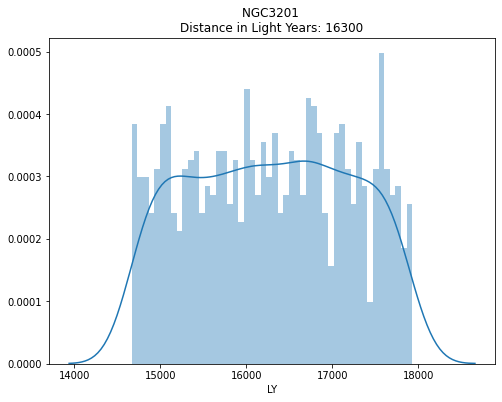

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams.update(Ipython_default);
plt.rcParams["figure.figsize"] = "8, 6"

# Plot a histogram with equally spaced bins
sns.distplot(r1['LY'],
             bins = 50, # try different numbers of bins
             kde=True,  # add a smooth curve using a kernel density estimate
)

plt.title(str(target1) + " \nDistance in Light Years: " + str(int(r1_ly)))

plt.show()

In [116]:
R_sun_limit = 100

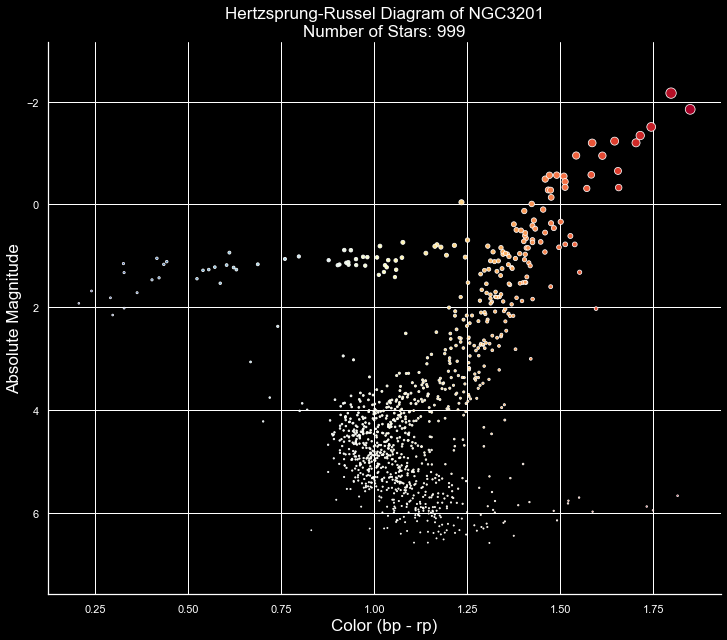

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

rr0 = r1[r1.R_sun > 0]
rr1 = r1[r1.R_sun < R_sun_limit]

plt.style.use('dark_background')
sns.relplot(x='bp_rp', y='M', height=8.5, aspect=1.2, legend=None,
            hue='bp_rp',
            palette='RdYlBu_r',
            size='R_sun',
            sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
            data=rr1
            )
plt.ylim(rr1['M'].max()+1, rr1['M'].min()-1)
plt.xlabel('Color (bp - rp)', fontsize = 17)
plt.ylabel('Absolute Magnitude', fontsize = 17)
plt.title('Hertzsprung-Russel Diagram of ' + str(target1) + '\nNumber of Stars: ' + str(rr1.shape[0]), 
          fontsize = 17)

plt.show()

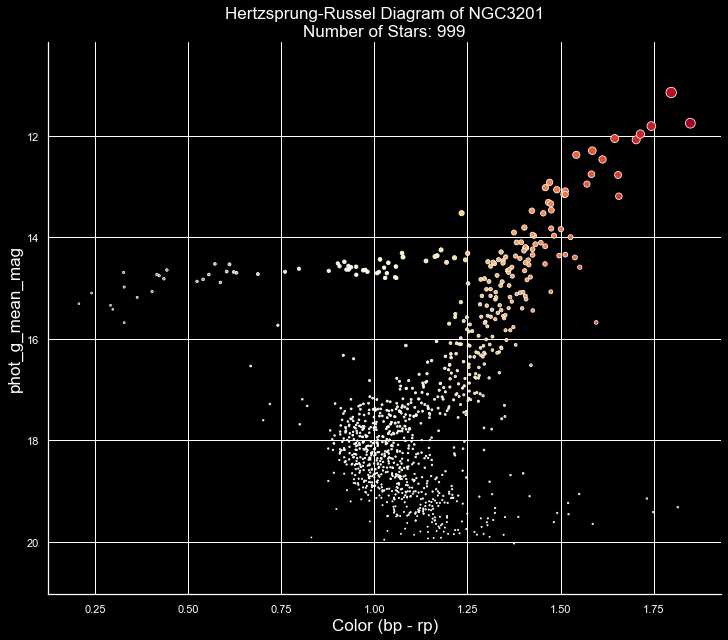

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

rr0 = r1[r1.R_sun > 0]
rr1 = r1[r1.R_sun < R_sun_limit]

plt.style.use('dark_background')
sns.relplot(x='bp_rp', y='phot_g_mean_mag', height=8.5, aspect=1.2, legend=None,
            hue='bp_rp',
            palette='RdYlBu_r',
            size='R_sun',
            sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
            data=rr1
            )
plt.ylim(rr1['phot_g_mean_mag'].max()+1, rr1['phot_g_mean_mag'].min()-1)
plt.xlabel('Color (bp - rp)', fontsize = 17)
plt.ylabel('phot_g_mean_mag', fontsize = 17)
plt.title('Hertzsprung-Russel Diagram of ' + str(target1) + '\nNumber of Stars: ' + str(rr1.shape[0]), 
          fontsize = 17)

plt.show()

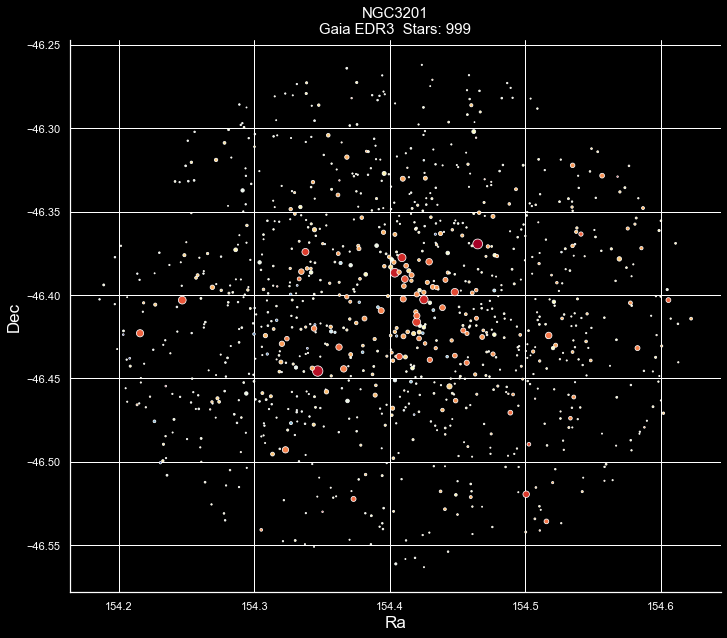


R_sun Max: 74.72


In [119]:
sns.set()

rr0 = r1[r1.R_sun > 0]
rr1 = r1[r1.R_sun < R_sun_limit]

plt.style.use('dark_background')
sns.relplot(x='ra', y='dec', height=8.5, aspect=1.2, legend=None,
            hue='bp_rp',
            palette='RdYlBu_r',
            size='R_sun',
            sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
            data=rr1
            )
plt.xlabel('Ra', fontsize = 17)
plt.ylabel('Dec', fontsize = 17)
plt.title(str(target1) + '\nGaia EDR3  Stars: ' + str(rr1.shape[0]), fontsize=15)
plt.show()    

print('\nR_sun Max: ' + str(rr1['R_sun'].max()))

In [120]:
f1 = r1

df_class_O = f1[(f1['SpT2'] >= "O0V") & (f1['SpT2'] <= "O9V")]
df_class_B = f1[(f1['SpT2'] >= "B0V") & (f1['SpT2'] <= "B9V")]
df_class_A = f1[(f1['SpT2'] >= "A0V") & (f1['SpT2'] <= "A9V")]
df_class_F = f1[(f1['SpT2'] >= "F0V") & (f1['SpT2'] <= "F9V")]
df_class_G = f1[(f1['SpT2'] >= "G0V") & (f1['SpT2'] <= "G9V")]
df_class_K = f1[(f1['SpT2'] >= "K0V") & (f1['SpT2'] <= "K9V")]
df_class_M = f1[(f1['SpT2'] >= "M0V") & (f1['SpT2'] <= "M9V")]
df_class_L = f1[(f1['SpT2'] >= "L0V") & (f1['SpT2'] <= "L9V")]
df_class_T = f1[(f1['SpT2'] >= "T0V") & (f1['SpT2'] <= "T9V")]

print("\nClass B: " + str(df_class_B.shape[0]))
print("Class A: " + str(df_class_A.shape[0]))
print("Class F: " + str(df_class_F.shape[0]))
print("Class G: " + str(df_class_G.shape[0]))
print("Class K: " + str(df_class_K.shape[0]))
print("Class M: " + str(df_class_M.shape[0]))
print("Class L: " + str(df_class_L.shape[0]))
print("Class T: " + str(df_class_T.shape[0]))


Class B: 0
Class A: 8
Class F: 20
Class G: 169
Class K: 736
Class M: 1
Class L: 0
Class T: 0


In [121]:
f1['Star_Type'] = ""

In [122]:
f1['Star_Type'] = np.where(f1.SpT2.between('O0', 'O9V'), 'Class O', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('B0', 'B9V'), 'Class B', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('A0', 'A9V'), 'Class A', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('F0', 'F9V'), 'Class F', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('G0', 'G9V'), 'Class G', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('K0', 'K9V'), 'Class K', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('M0', 'M9.5V'), 'Class M', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('L0', 'L9.5V'), 'Class L', f1['Star_Type'])
f1['Star_Type'] = np.where(f1.SpT2.between('T0', 'T9.5V'), 'Class T', f1['Star_Type'])

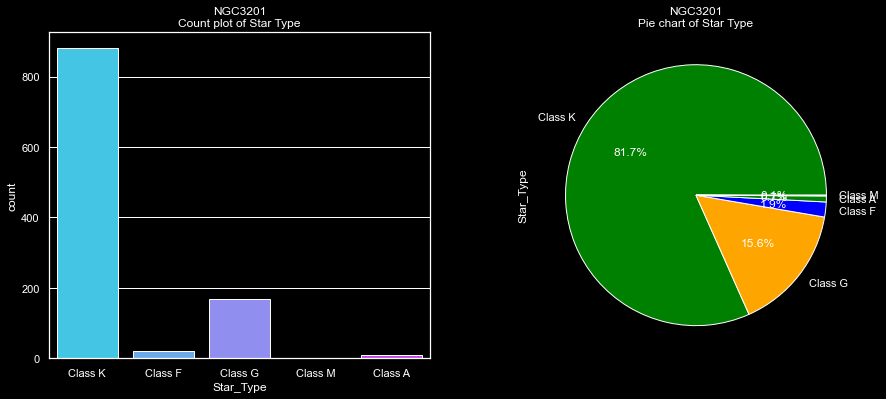

In [123]:
plt.style.use('dark_background')
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Star_Type' , palette= 'cool', data= f1) 
plt.title(str(target1) + "\nCount plot of Star Type")

plt.subplot(1,2,2)
count = f1['Star_Type'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange','blue'],
               title = str(target1) + "\nPie chart of Star Type")
plt.show()

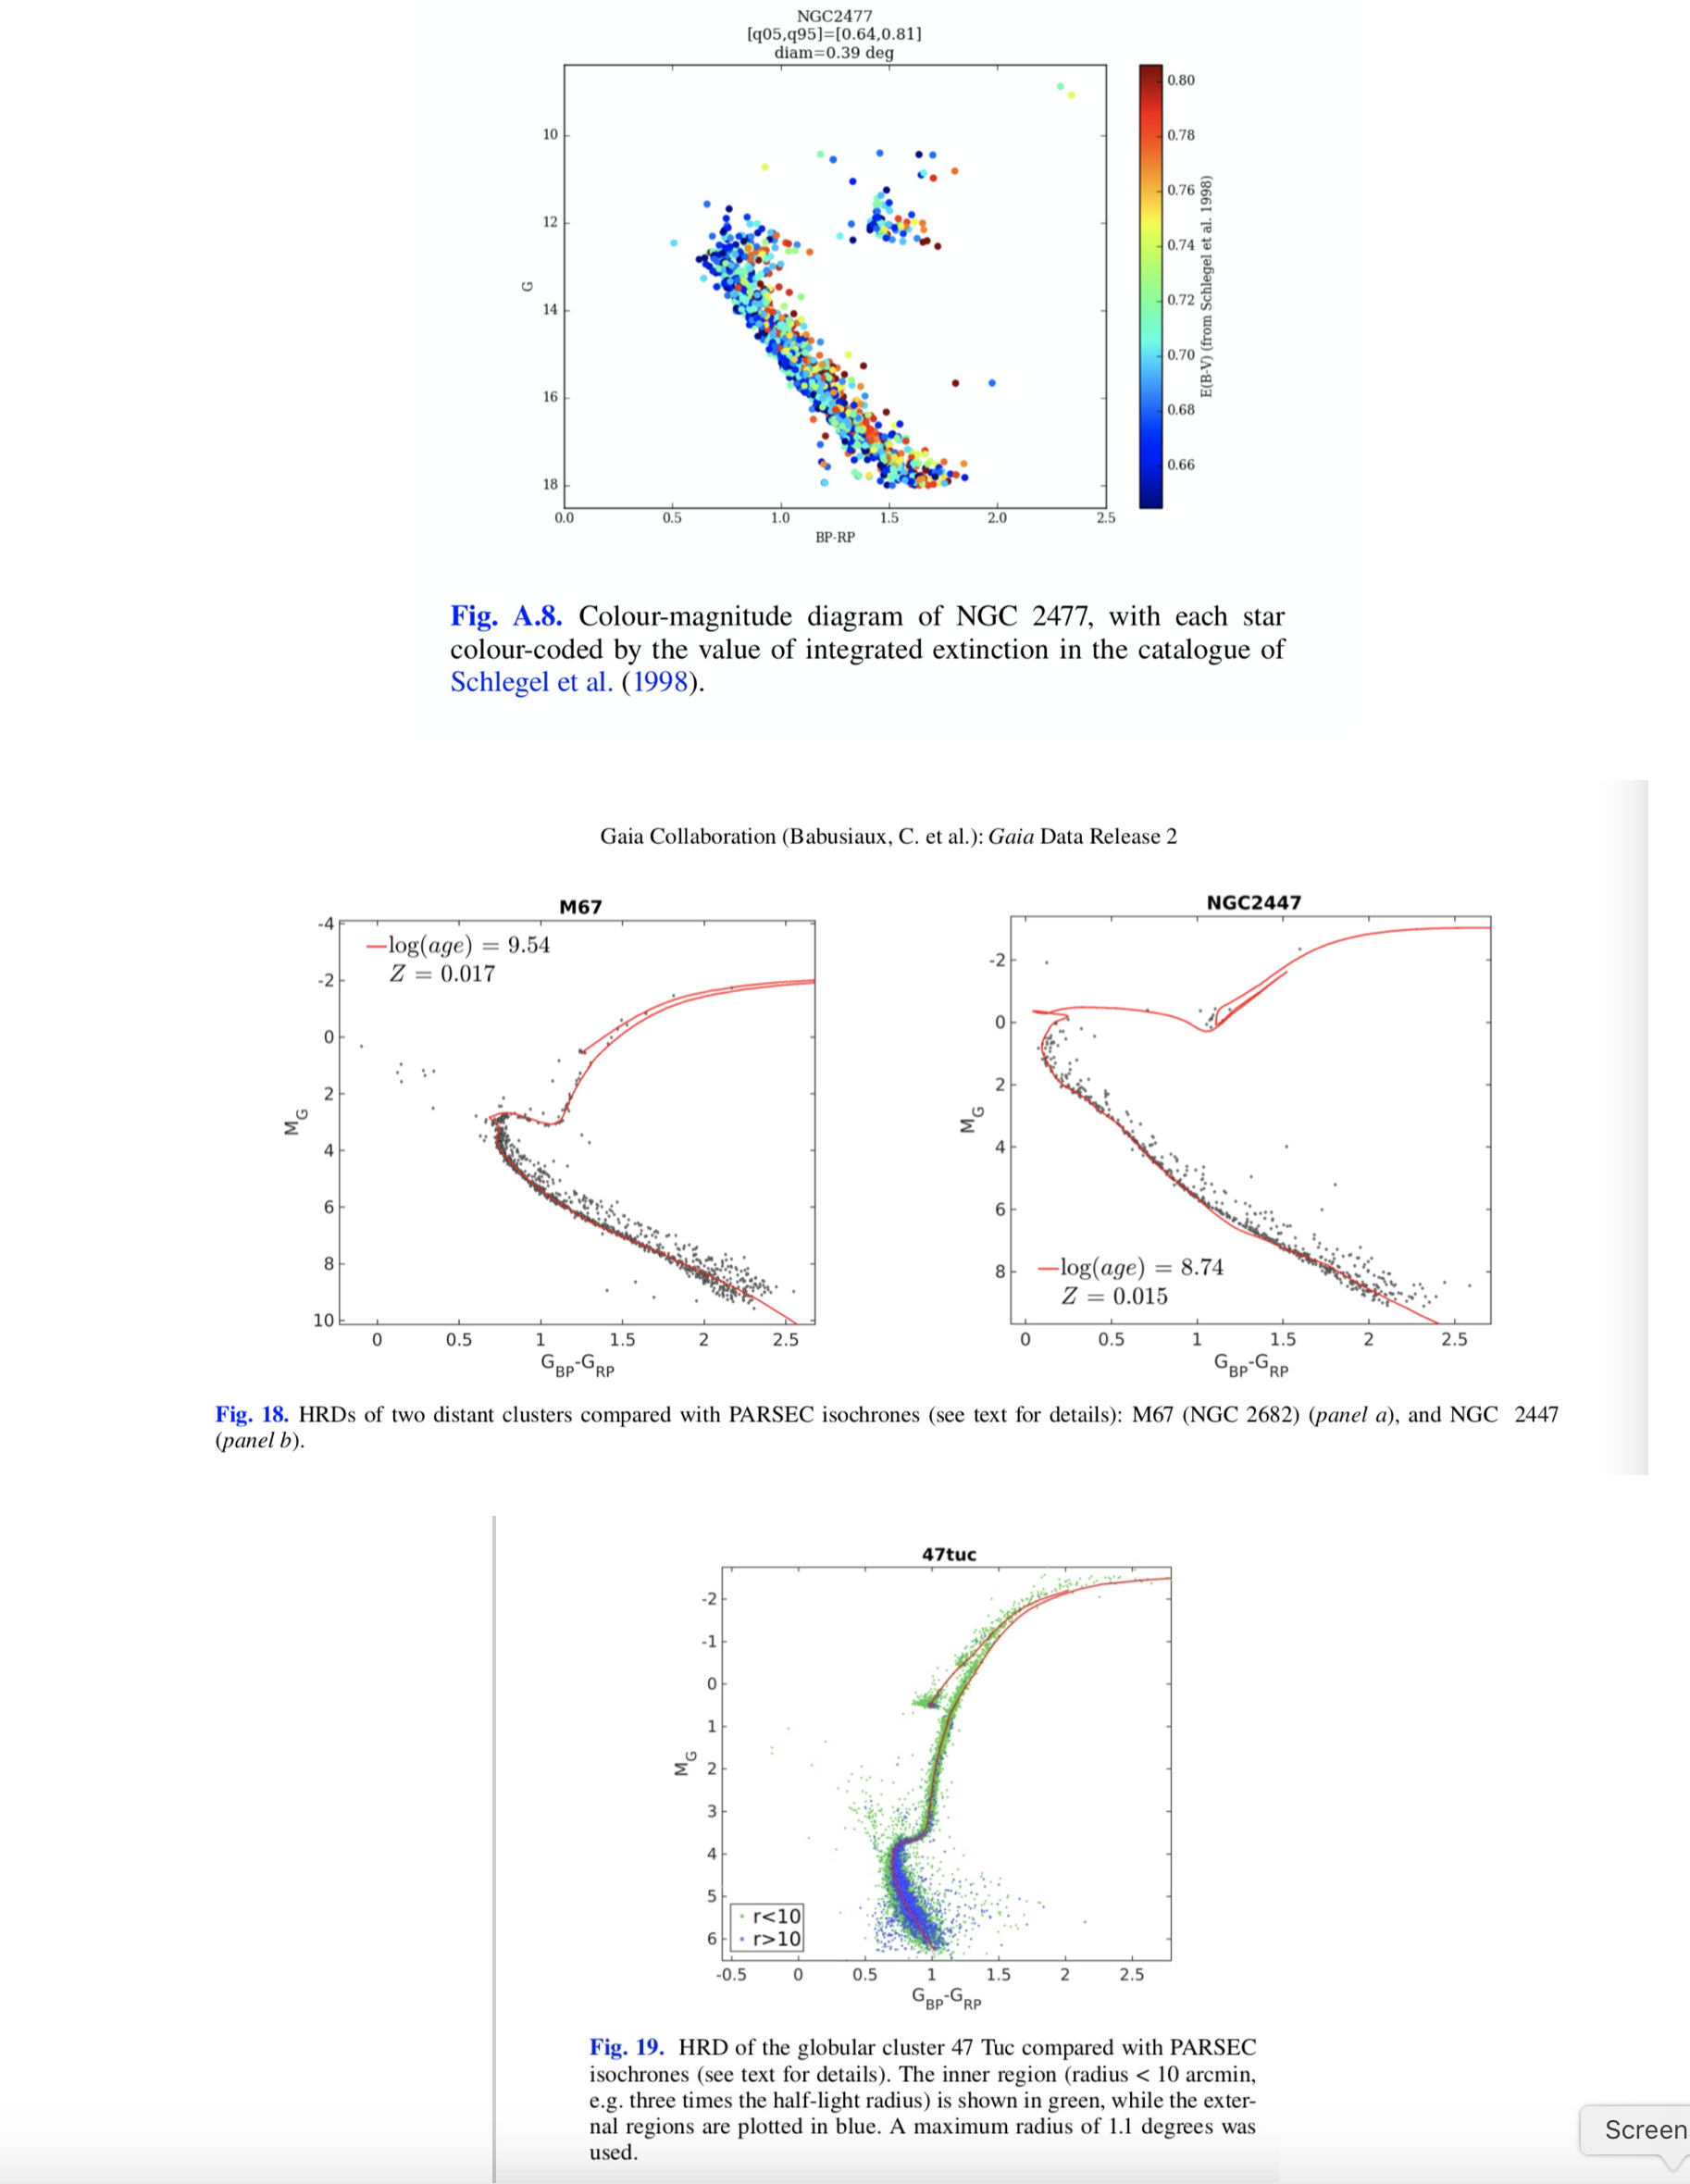